# Bank Marketing

This dataset is based on "Bank Marketing" UCI dataset (please check the description at: http://archive.ics.uci.edu/ml/datasets/Bank+Marketing).
   The data is enriched by the addition of five new social and economic features/attributes (national wide indicators from a ~10M population country), published by the Banco de Portugal and publicly available at: https://www.bportugal.pt/estatisticasweb.
   This dataset is almost identical to the one used in [Moro et al., 2014] (it does not include all attributes due to privacy concerns). 
  


    Number of Instances: 41188 

    Number of Attributes: 20 + output attribute.

    Attribute information:

   

   Input variables:
   
### Bank client data:
   
   1 - age (numeric)
   
   2 - job : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")
   
   3 - marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)
   
   4 - education(categorical:"basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")
   
   5 - default: has credit in default? (categorical: "no","yes","unknown")
   
   6 - housing: has housing loan? (categorical: "no","yes","unknown")
   
   7 - loan: has personal loan? (categorical: "no","yes","unknown")
   
### Related with the last contact of the current campaign:
   8 - contact: contact communication type (categorical: "cellular","telephone") 
   
   9 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  
  10 - day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")
  
  11 - duration: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

### Other attributes:
  
  12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  
  13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
  
  14 - previous: number of contacts performed before this campaign and for this client (numeric)
  
  15 - poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")
  
   ### Social and economic context attributes
  
  16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
  
  17 - cons.price.idx: consumer price index - monthly indicator (numeric)     
  
  18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)     
  
  19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
  
  20 - nr.employed: number of employees - quarterly indicator (numeric)

  Output variable (desired target):
  
  21 - y - has the client subscribed a term deposit? (binary: "yes","no")

#### We will be predicting where a client will buy the term deposit or not using machine learning algorithms. Also we would be using gain and lift chart to improve the efficiency of our marketing campaign.

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import roc_auc_score
import scikitplot as skplt

from sklearn.metrics import roc_curve,confusion_matrix,classification_report
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier

In [2]:
bank=pd.read_csv('bank-additional-full.csv',sep=';')

# Exploring data

In [3]:
bank

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [4]:
from scipy.stats import chisquare,chi2_contingency

In [5]:
bank['y'].value_counts()/bank['y'].count()*100

y
no     88.734583
yes    11.265417
Name: count, dtype: float64

There is an 11.26 percent chance of a customer subscribing to Term Deposit

# Exploratory data analysis

### 1) Age

C:\Users\vivaswan.jinturkar\AppData\Local\Temp\ipykernel_23920\1492813763.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bank['age'],kde=False,hist_kws=dict(edgecolor="black", linewidth=2))


<Axes: xlabel='age'>

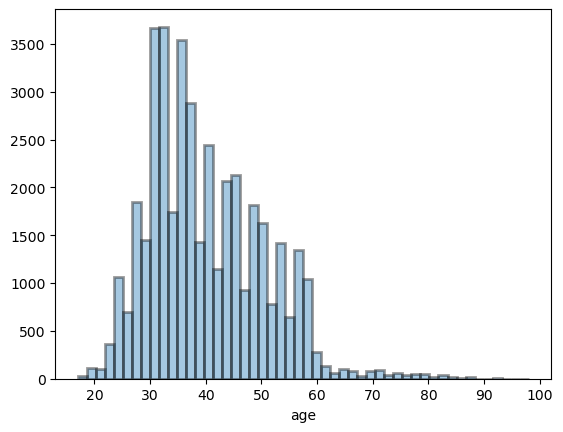

In [6]:
sns.distplot(bank['age'],kde=False,hist_kws=dict(edgecolor="black", linewidth=2))

In [7]:
#a fucntion to create contingency tables
def contingency(a,b,norm=False):
    table=pd.crosstab(bank[a],bank[b],normalize=norm)
    return table


In [8]:
contingency('age','y','columns').sort_values('yes',ascending=False)*100

y,no,yes
age,,
31,4.725293,4.741379
33,4.440735,4.525862
30,4.137025,4.353448
29,3.466674,4.008621
34,4.271096,3.965517
...,...,...
98,0.000000,0.043103
87,0.000000,0.021552
91,0.005472,0.000000


C:\Users\vivaswan.jinturkar\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vivaswan.jinturkar\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vivaswan.jinturkar\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vivaswan.jinturkar\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and w

<Axes: xlabel='age', ylabel='y'>

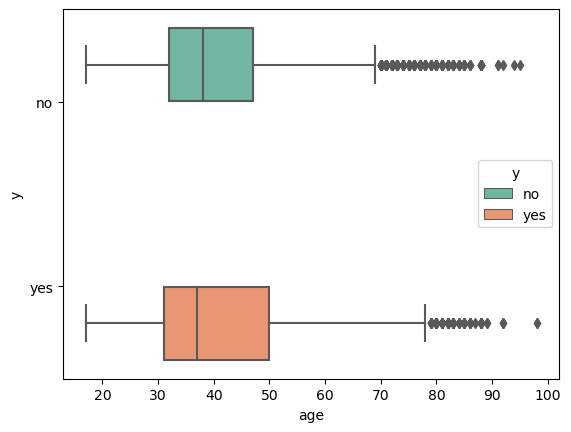

In [9]:
sns.boxplot(x=bank['age'],y=bank['y'],hue=bank['y'],palette='Set2')

Age may not be a major factor looking at the distribution of ages for subscription to the term deposit

### 2) Job

In [10]:
contingency('y','job','index')*100

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
y,,,,,,,,,,,,
no,24.816679,23.574477,3.644522,2.610266,7.102988,3.518660,3.480355,9.975922,1.641677,16.452337,2.380431,0.801685
yes,29.137931,13.750000,2.672414,2.284483,7.068966,9.353448,3.211207,6.961207,5.926724,15.732759,3.103448,0.797414


C:\Users\vivaswan.jinturkar\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vivaswan.jinturkar\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vivaswan.jinturkar\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vivaswan.jinturkar\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and w

<Axes: xlabel='job', ylabel='count'>

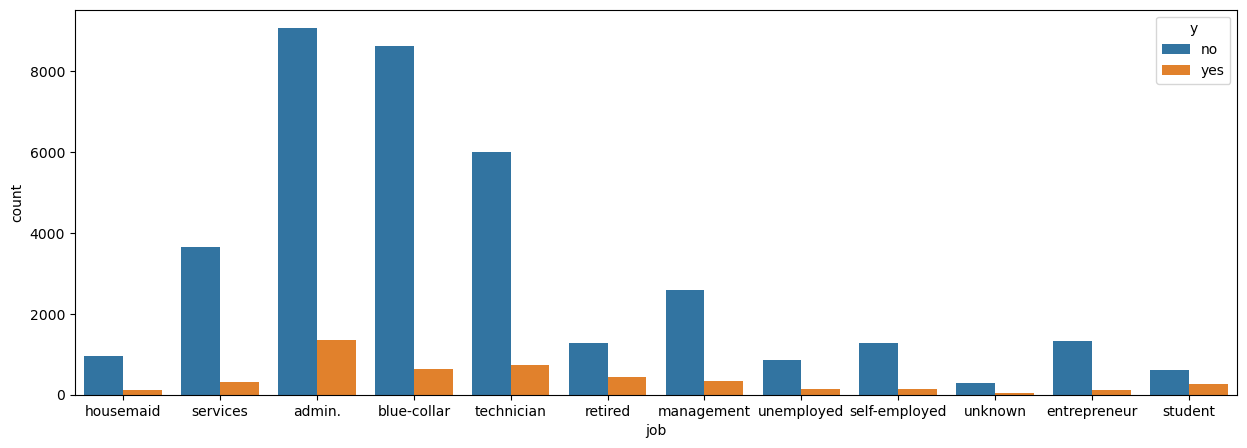

In [11]:
plt.figure(figsize=(15,5))
sns.countplot(x=bank['job'],hue=bank['y'])

The people from having administrative, technician and blue collored job have higher chances of subscribing

### 3) Marital

In [12]:
contingency('y','marital','index')*100

marital,divorced,married,single,unknown
y,,,,
no,11.316625,61.278319,27.219000,0.186057
yes,10.258621,54.568966,34.913793,0.258621


Married people are most likely to subscribe to term deopsit 

### 4) Education

In [13]:
contingency('y','education','index')*100

education,basic.4y,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree,unknown
y,,,,,,,,
no,10.255007,5.756813,15.245704,23.213309,0.038306,12.717522,28.723870,4.049469
yes,9.224138,4.051724,10.193966,22.219828,0.086207,12.823276,35.991379,5.409483


People with university degree have high chances of subscribing at 35%

### 5) Default

In [14]:
contingency('y','default','index')*100

default,no,unknown,yes
y,,,
no,77.681405,22.310386,0.008208
yes,90.452586,9.547414,0.000000


none of the people who had defaulted created subscribed to term deposit

90% of the people who did not default subscribed 

### 6) Housing

In [15]:
contingency('y','housing','index')*100

housing,no,unknown,yes
y,,,
no,45.408777,2.416001,52.175222
yes,43.663793,2.306034,54.030172


No major impact of housing on subscription

### 7) Loan

In [16]:
contingency('y','loan','index')*100

loan,no,unknown,yes
y,,,
no,82.357448,2.416001,15.226551
yes,82.974138,2.306034,14.719828


Of the people who subscribed to the term deposit did not have  personal loan

### 8) Contact

In [17]:
bank['contact'].value_counts()

contact
cellular     26144
telephone    15044
Name: count, dtype: int64

In [18]:
contingency('y','contact','index')*100

contact,cellular,telephone
y,,
no,60.991026,39.008974
yes,83.038793,16.961207


### 9) Month

In [19]:
contingency('y','month','columns')*100

month,apr,aug,dec,jul,jun,mar,may,nov,oct,sep
y,,,,,,,,,,
no,79.521277,89.397863,51.098901,90.953443,89.48853,49.450549,93.565255,89.856133,56.128134,55.087719
yes,20.478723,10.602137,48.901099,9.046557,10.51147,50.549451,6.434745,10.143867,43.871866,44.912281


More people tend the subscribe (40-50) percent in the months of march, october,september and december

In [20]:
contingency('y','month','index')*100

month,apr,aug,dec,jul,jun,mar,may,nov,oct,sep
y,,,,,,,,,,
no,5.726716,15.111634,0.254460,17.853234,13.021232,0.738755,35.249535,10.082631,1.102660,0.859144
yes,11.616379,14.116379,1.918103,13.987069,12.047414,5.948276,19.094828,8.965517,6.788793,5.517241


Of  the people who subscribed maximun subscribed in march

### 10) Day of week

In [21]:
contingency('y','day_of_week','columns')*100

day_of_week,fri,mon,thu,tue,wed
y,,,,,
no,89.191261,90.05168,87.881248,88.220025,88.332924
yes,10.808739,9.94832,12.118752,11.779975,11.667076


no major impact of day of the week on subscription

### 11) Duration

C:\Users\vivaswan.jinturkar\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vivaswan.jinturkar\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vivaswan.jinturkar\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vivaswan.jinturkar\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and w

<Axes: xlabel='duration', ylabel='y'>

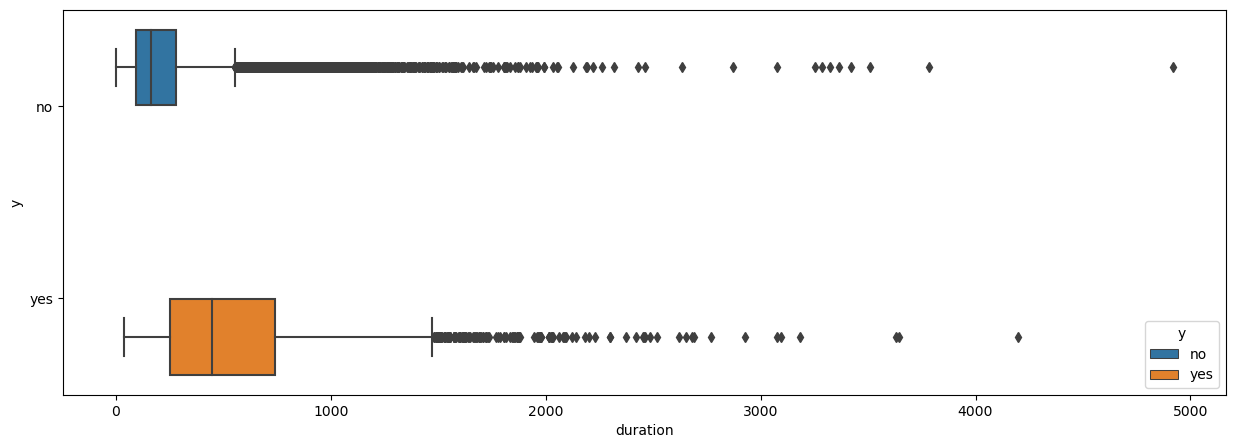

In [22]:
plt.figure(figsize=(15,5))
sns.boxplot(x=bank['duration'],y=bank['y'],hue= bank['y'])

Clearly show that calls with higher duartions can covert potential customers to subscribers 

### 12) Campaign

C:\Users\vivaswan.jinturkar\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vivaswan.jinturkar\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vivaswan.jinturkar\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vivaswan.jinturkar\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and w

<Axes: xlabel='campaign', ylabel='count'>

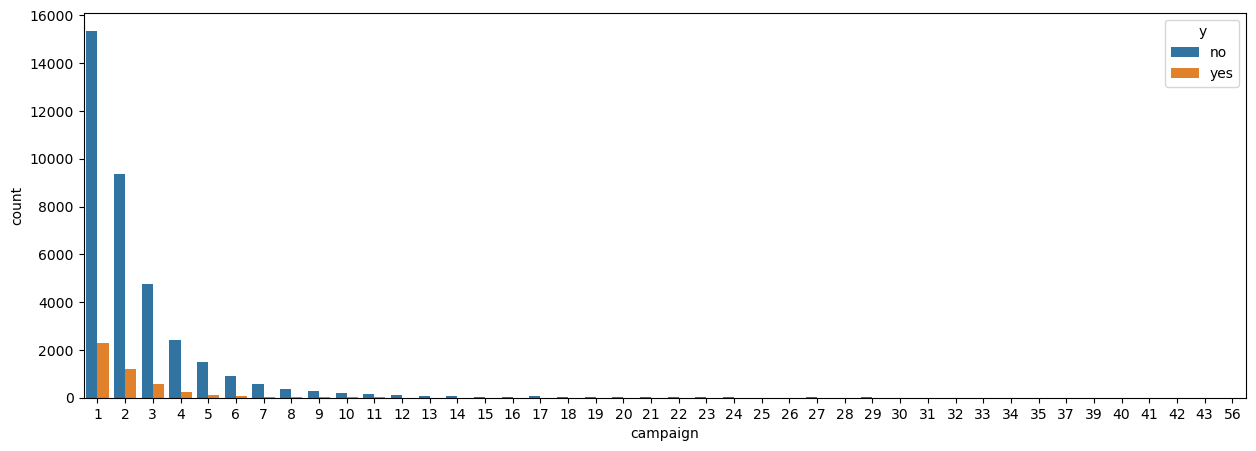

In [23]:
plt.figure(figsize=(15,5))
sns.countplot(x=bank['campaign'],hue=bank['y'])

In [24]:
contingency('y','campaign','index')*100

campaign,1,2,3,4,5,6,7,8,9,10,...,33,34,35,37,39,40,41,42,43,56
y,,,,,,,,,,,,,,,,,,,,,
no,41.977673,25.607420,13.043121,6.572179,4.046733,2.473460,1.617052,1.047937,0.727810,0.582795,...,0.010945,0.008208,0.013681,0.002736,0.002736,0.005472,0.002736,0.005472,0.005472,0.002736
yes,49.568966,26.099138,12.370690,5.366379,2.586207,1.616379,0.818966,0.366379,0.366379,0.258621,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Of the people who subscribe 50% did it in first call and around 88% subscribed in first 3 calls

### 13) pdays

In [25]:
bank['pdays'].value_counts()/bank['pdays'].count()*100

pdays
999    96.321744
3       1.065844
6       1.000291
4       0.286491
9       0.155385
2       0.148101
7       0.145673
12      0.140818
10      0.126250
5       0.111683
13      0.087404
11      0.067981
1       0.063125
15      0.058269
14      0.048558
8       0.043702
0       0.036418
16      0.026707
17      0.019423
18      0.016995
22      0.007284
19      0.007284
21      0.004856
25      0.002428
26      0.002428
27      0.002428
20      0.002428
Name: count, dtype: float64

96 percent of the clients were never contacted before

In [26]:
(contingency('y','pdays','index')*100).T

y,no,yes
pdays,,
0,0.013681,0.215517
1,0.049250,0.172414
2,0.065667,0.797414
3,0.385794,6.422414
4,0.150487,1.357759
5,0.046514,0.625000
6,0.336544,6.228448
7,0.054723,0.862069
8,0.016417,0.258621


Of the people who subscribed around 21 percent were previously contacted in the last 27 days. 79 perccent were never conatcted before

### 14) Previous

In [27]:
contingency('y','previous','index')*100

previous,0,1,2,3,4,5,6,7
y,,,,,,,,
no,88.710737,9.833643,1.105396,0.240779,0.087556,0.013681,0.005472,0.002736
yes,67.693966,20.840517,7.543103,2.758621,0.818966,0.280172,0.064655,0.000000


we can see that the percentage of people subscribing falls as the number of contacts increase. 

  ### 15) Poutcome

In [28]:
contingency('y','poutcome','index')*100

poutcome,failure,nonexistent,success
y,,,
no,9.978658,88.710737,1.310605
yes,13.038793,67.693966,19.267241


around 19 percent subscribed once again after subscribing in the previous campaign.

### 16) Emp.var.rate

In [29]:
bank['emp.var.rate'].value_counts()

emp.var.rate
 1.4    16234
-1.8     9184
 1.1     7763
-0.1     3683
-2.9     1663
-3.4     1071
-1.7      773
-1.1      635
-3.0      172
-0.2       10
Name: count, dtype: int64

In [30]:
contingency('y','emp.var.rate','index')*100

emp.var.rate,-3.4,-3.0,-2.9,-1.8,-1.7,-1.1,-0.2,-0.1,1.1,1.4
y,,,,,,,,,,
no,1.688191,0.229835,2.924921,21.131115,1.012367,0.913867,0.024625,9.442377,20.583890,42.048813
yes,9.784483,1.896552,12.801724,31.487069,8.685345,6.487069,0.021552,5.000000,5.172414,18.663793


In [31]:
contingency('y','emp.var.rate','columns')*100

emp.var.rate,-3.4,-3.0,-2.9,-1.8,-1.7,-1.1,-0.2,-0.1,1.1,1.4
y,,,,,,,,,,
no,57.609711,48.837209,64.281419,84.091899,47.865459,52.598425,90.0,93.700787,96.908412,94.665517
yes,42.390289,51.162791,35.718581,15.908101,52.134541,47.401575,10.0,6.299213,3.091588,5.334483


majority of the people who said yes,said yes when the emplyment variation rate was  -.9,-1.8,1.4 and -3.4

### 17) Cons.price.index


C:\Users\vivaswan.jinturkar\AppData\Local\Temp\ipykernel_23920\4024020823.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bank[bank['y']=='yes']['cons.price.idx'],hist_kws=dict(edgecolor="black", linewidth=2),kde=False,bins=10)


<Axes: xlabel='cons.price.idx'>

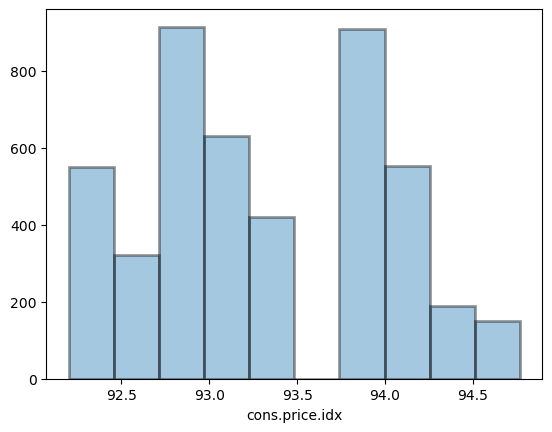

In [32]:
sns.distplot(bank[bank['y']=='yes']['cons.price.idx'],hist_kws=dict(edgecolor="black", linewidth=2),kde=False,bins=10)

### 18) Cons.conf.idx

C:\Users\vivaswan.jinturkar\AppData\Local\Temp\ipykernel_23920\2953019543.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bank[bank['y']=='yes']['cons.conf.idx'],hist_kws=dict(edgecolor="black", linewidth=2),kde=False,bins=20)


<Axes: xlabel='cons.conf.idx'>

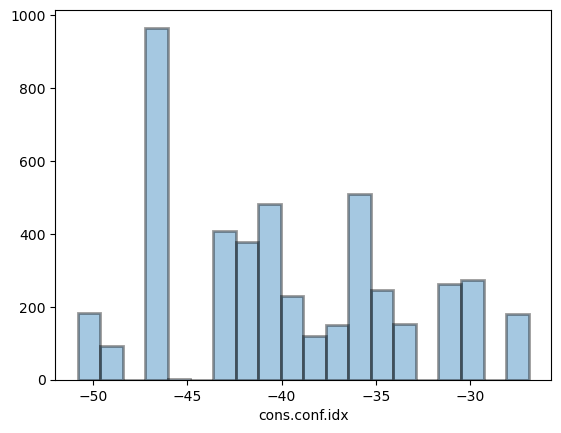

In [33]:
sns.distplot(bank[bank['y']=='yes']['cons.conf.idx'],hist_kws=dict(edgecolor="black", linewidth=2),kde=False,bins=20)

### 19) Euribor3m

C:\Users\vivaswan.jinturkar\AppData\Local\Temp\ipykernel_23920\734236213.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bank[bank['y']=='yes']['euribor3m'],hist_kws=dict(edgecolor="black", linewidth=2),kde=False,bins=10)


<Axes: xlabel='euribor3m'>

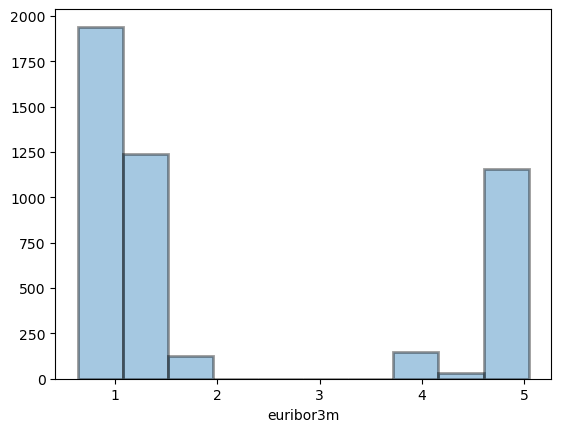

In [34]:
sns.distplot(bank[bank['y']=='yes']['euribor3m'],hist_kws=dict(edgecolor="black", linewidth=2),kde=False,bins=10)

### 20) Nr.employed

C:\Users\vivaswan.jinturkar\AppData\Local\Temp\ipykernel_23920\812523512.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bank[bank['y']=='yes']['nr.employed'],hist_kws=dict(edgecolor="black", linewidth=2),kde=False,bins=20)


<Axes: xlabel='nr.employed'>

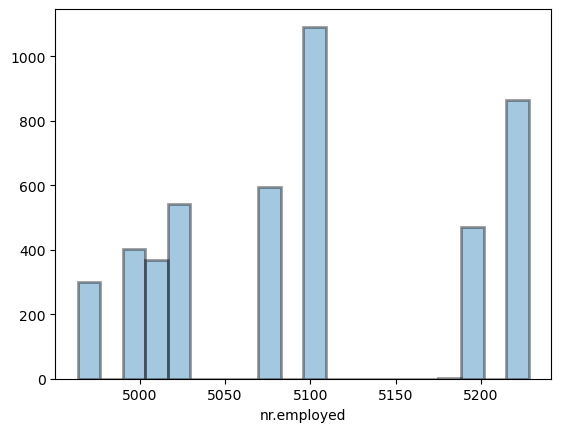

In [35]:
sns.distplot(bank[bank['y']=='yes']['nr.employed'],hist_kws=dict(edgecolor="black", linewidth=2),kde=False,bins=20)

# Preprocessing

In [36]:
bank[bank.duplicated()]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20216,55,services,married,high.school,unknown,no,no,cellular,aug,mon,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20534,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25217,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,...,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


In [37]:
bank=bank.drop_duplicates()

In [38]:
bank['y']=bank['y'].map({'no':0,'yes':1})

C:\Users\vivaswan.jinturkar\AppData\Local\Temp\ipykernel_23920\2889346498.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bank['y']=bank['y'].map({'no':0,'yes':1})


In [39]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null  floa

# Manual encoding

In [40]:
bank['month']=bank['month'].map({'dec':12,'may':5, 'feb':2, 'nov':11, 'oct':10, 'sep':9, 'mar':3, 'apr':4,
       'aug':8, 'jun':6, 'jan':1, 'jul':7})


C:\Users\vivaswan.jinturkar\AppData\Local\Temp\ipykernel_23920\1559155700.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bank['month']=bank['month'].map({'dec':12,'may':5, 'feb':2, 'nov':11, 'oct':10, 'sep':9, 'mar':3, 'apr':4,


In [41]:
bank['day_of_week']=bank['day_of_week'].map({'mon':1, 'tue':2, 'wed':3, 'thu':4, 'fri':5})

C:\Users\vivaswan.jinturkar\AppData\Local\Temp\ipykernel_23920\2907505078.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bank['day_of_week']=bank['day_of_week'].map({'mon':1, 'tue':2, 'wed':3, 'thu':4, 'fri':5})


In [42]:
bank['education']=bank['education'].map({'basic.4y':2, 'high.school':5, 'basic.6y':3, 'basic.9y':4,
       'professional.course':6, 'unknown':1, 'university.degree':7,
       'illiterate':0})

C:\Users\vivaswan.jinturkar\AppData\Local\Temp\ipykernel_23920\4154176432.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bank['education']=bank['education'].map({'basic.4y':2, 'high.school':5, 'basic.6y':3, 'basic.9y':4,


In [43]:
bank.drop('duration',inplace=True,axis=1)

C:\Users\vivaswan.jinturkar\AppData\Local\Temp\ipykernel_23920\1474328298.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bank.drop('duration',inplace=True,axis=1)


### Getting dummy varaibles

In [44]:
numeric_cols=bank.columns.tolist()
# Define the features that need ordinal encoding and one-hot encoding
ordinal_encoded_features = ['marital','default','housing','loan','poutcome','contact']
one_hot_encoded_features = ['job']


In [45]:
for i in ordinal_encoded_features+one_hot_encoded_features:
    numeric_cols.remove(i)

In [83]:
numeric_cols

['age',
 'education',
 'month',
 'day_of_week',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'y']

In [46]:

# Create transformers
ordinal_encoder = OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=-1)
one_hot_encoder = OneHotEncoder(handle_unknown='ignore')

# Create a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('ordinal_encoder', ordinal_encoder, ordinal_encoded_features),
        ('one_hot_encoder', one_hot_encoder, one_hot_encoded_features)
    ],
    remainder='passthrough'  # Pass through the columns not specified in transformers
)



transformed_data = preprocessor.fit_transform(bank)

# Get the column names after one-hot encoding
one_hot_column_names = preprocessor.named_transformers_['one_hot_encoder'].get_feature_names_out(one_hot_encoded_features)

# Fit the pipeline on your data
transformed_data = pd.DataFrame(transformed_data, columns=ordinal_encoded_features + list(one_hot_column_names) + numeric_cols)


In [47]:
y=transformed_data['y']
X=transformed_data.drop('y',axis=1)

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42,stratify=y)

# class imabalnce

In [49]:
y.value_counts()/y.count()*100

y
0.0    88.733728
1.0    11.266272
Name: count, dtype: float64

# Random Forest Classifier

In [50]:
from sklearn.ensemble import RandomForestClassifier

In [68]:
rfc=RandomForestClassifier(n_estimators=100,class_weight='balanced')

In [69]:
rfc.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced')

In [70]:
rfc_pred=rfc.predict(X_test)

In [71]:
confusion_matrix(y_test,rfc_pred)

array([[11735,   323],
       [ 1116,   415]], dtype=int64)

In [72]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

         0.0       0.91      0.97      0.94     12058
         1.0       0.56      0.27      0.37      1531

    accuracy                           0.89     13589
   macro avg       0.74      0.62      0.65     13589
weighted avg       0.87      0.89      0.88     13589



In [73]:
rfc_prob=rfc.predict_proba(X_test)

C:\Users\vivaswan.jinturkar\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


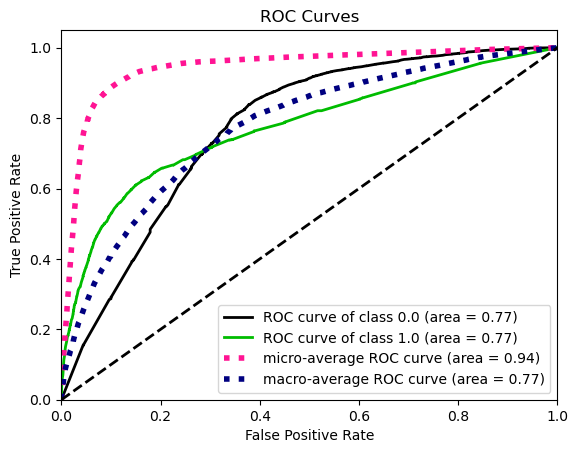

In [74]:
skplt.metrics.plot_roc_curve(y_test, rfc_prob)
plt.show()

In [75]:
roc_auc_score(y_test,rfc_prob[:,1])

0.7739725010803976

In [76]:
#fucntion to calculate right cutoff probability using youden's J statistic
def threshold(y_test,prob):
    # calculate roc curves

    fpr, tpr, thresholds=roc_curve(y_test,prob[:,1])
    # get the best threshold
    J = tpr - fpr
    ix = np.argmax(J)
    best_thresh = thresholds[ix]
    return best_thresh

In [77]:
thresh=threshold(y_test,rfc_prob)

In [78]:
thresh

0.14774676478051255

In [79]:
rfc_prob=rfc_prob[:,1]

In [80]:
rfc_prob[rfc_prob>thresh]=1
rfc_prob[rfc_prob<=thresh]=0

In [81]:
print(classification_report(y_test,rfc_prob))

              precision    recall  f1-score   support

         0.0       0.95      0.84      0.89     12058
         1.0       0.33      0.62      0.43      1531

    accuracy                           0.81     13589
   macro avg       0.64      0.73      0.66     13589
weighted avg       0.88      0.81      0.84     13589



In [82]:
confusion_matrix(y_test,rfc_prob)

array([[10110,  1948],
       [  579,   952]], dtype=int64)